# Medical data visualizer

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("medical_examination.csv")

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


***Column descriptions:***

*id: Unique identifier for each patient in the dataset.*

*age: Age of the patient in days.*

*gender: Gender of the patient, where 1 = men, 2 = women and 3 = other*

*height: Height of the patient in centimeters.*

*weight: Weight of the patient in kilograms.*

*ap_hi: Systolic blood pressure of the patient, measured in mmHg.*

*ap_lo: Diastolic blood pressure of the patient, measured in mmHg.*

*cholesterol: Cholesterol level of the patient, where 1 = normal, 2 = above normal, and 3 = well above normal.*

*gluc: Glucose level of the patient, where 1 = normal, 2 = above normal, and 3 = well above normal.*

*smoke: Whether the patient is a smoker or not, where 0 = non-smoker and 1 = smoker.*

*alco: Whether the patient is an alcohol drinker or not, where 0 = non-drinker and 1 = drinker.*

*active: Whether the patient is physically active or not, where 0 = inactive and 1 = active.*

*cardio: Whether the patient has cardiovascular disease or not, where 0 = no disease and 1 = disease.*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df = df.drop(['id'], axis=1)

In [7]:
df['age'] = (df['age']/365).round(0)

In [8]:
df['height'] = (df['height']/100).round(2)

In [9]:
def calculate_bmi(weight, height):
    bmi = weight / (height ** 2)
    return bmi

In [10]:
df['bmi'] = (calculate_bmi(df['weight'], df['height'])).round(2)
df['overweight'] = df['bmi'].apply(lambda x: 1 if x > 25 else 0)

In [11]:
def calculate_blood_pressure(ap_hi, ap_lo):
    if ap_hi >= 140 or ap_lo >= 90:
        return 2
    elif ap_hi >= 130 or ap_lo >= 80:
        return 1
    else:
        return 0

In [12]:
df['blood_pressure'] = df.apply(lambda x: calculate_blood_pressure(x['ap_hi'], x['ap_lo']), axis=1)

In [13]:
df = df[df['gender'] != 3]
df['gender'] = df['gender'].replace({1: 0, 2: 1})

In [14]:
df['gender']

0        1
1        0
2        0
3        1
4        0
        ..
69995    1
69996    0
69997    1
69998    0
69999    0
Name: gender, Length: 69989, dtype: int64

## Exploratory Data Analysis

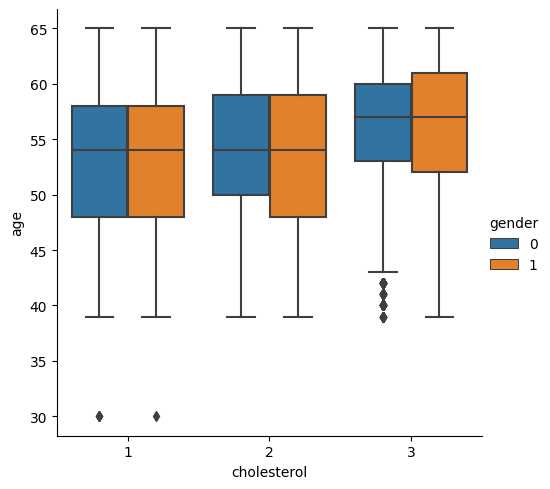

In [15]:
# examine relationship between age and cholesterol
sns.catplot(x="cholesterol", y="age", hue="gender", kind="box", data=df)
plt.show()

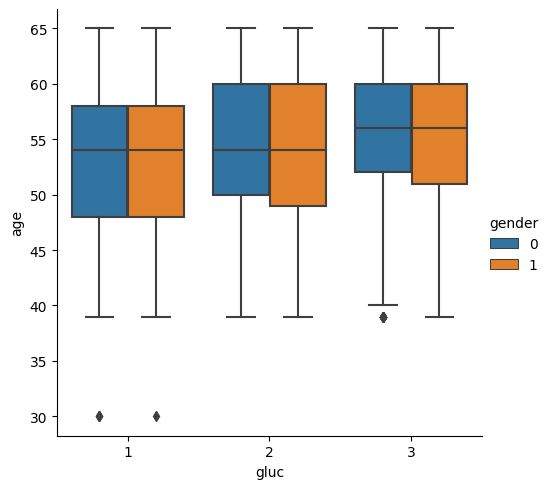

In [16]:
# examine relationship between age and glucose
sns.catplot(x="gluc", y="age", hue="gender", kind="box", data=df)
plt.show()

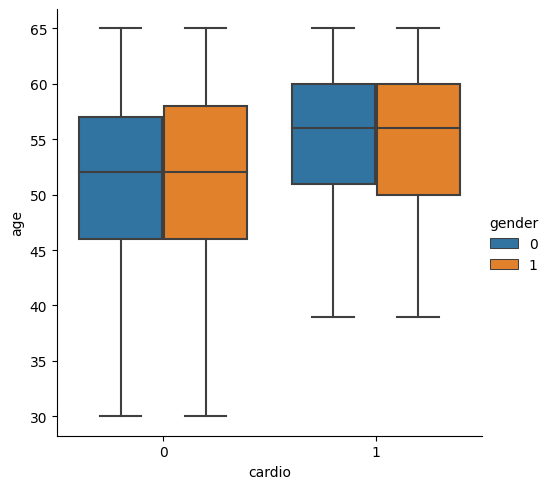

In [17]:
# examine relationship between age and cardio
sns.catplot(x="cardio", y="age", hue="gender", kind="box", data=df)
plt.show()

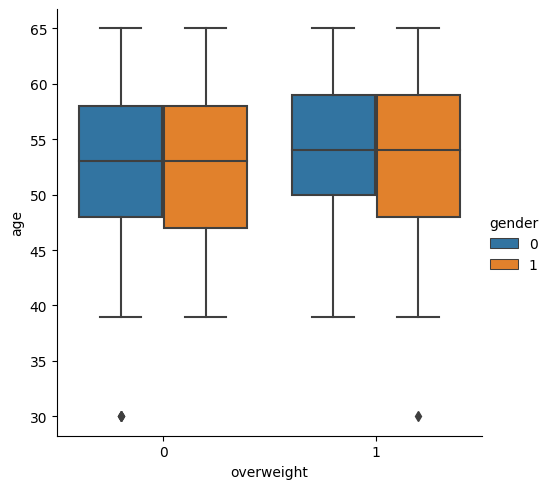

In [18]:
# examine relationship between age and BMI
sns.catplot(x="overweight", y="age", hue="gender", kind="box", data=df)
plt.show()

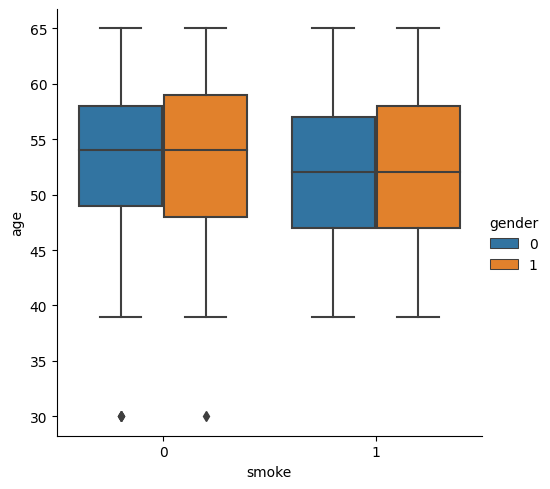

In [19]:
# examine relationship between age and smoke
sns.catplot(x="smoke", y="age", hue="gender", kind="box", data=df)
plt.show()

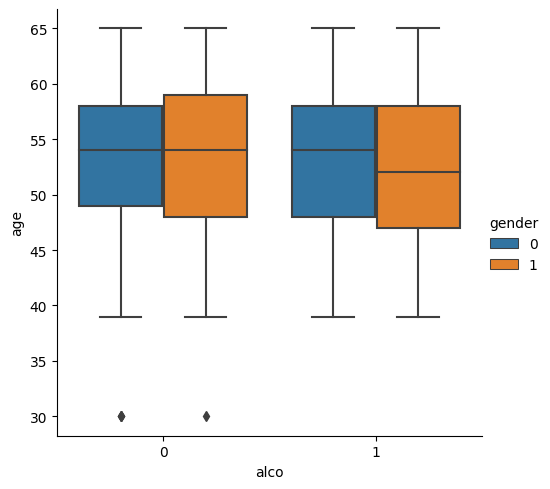

In [20]:
# examione relationship between age and alcohol
sns.catplot(x="alco", y="age", hue="gender", kind="box", data=df)
plt.show()

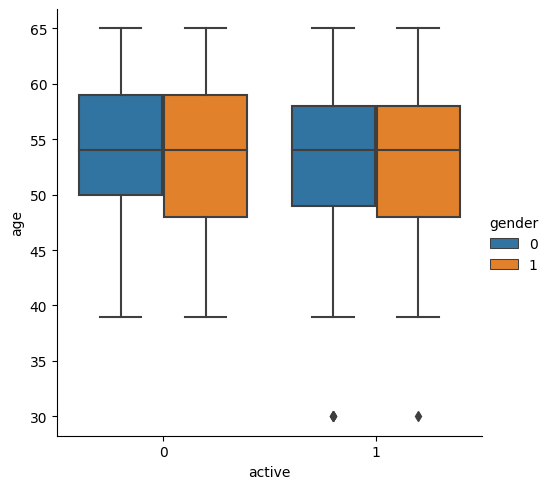

In [21]:
sns.catplot(x="active", y="age", hue="gender", kind="box", data=df)
plt.show()

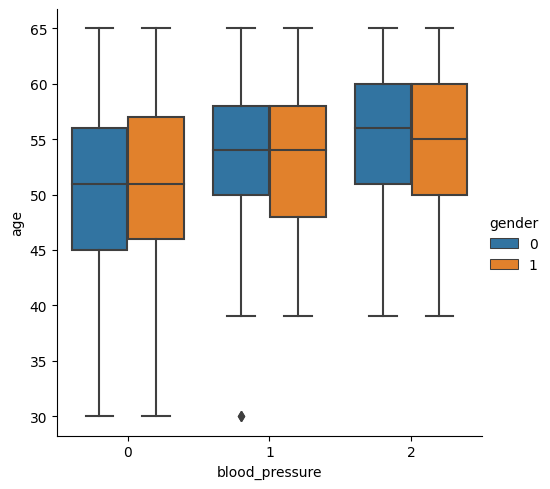

In [22]:
# examine relationship between age and blood pressure
sns.catplot(x="blood_pressure", y="age", hue="gender", kind="box", data=df)
plt.show()

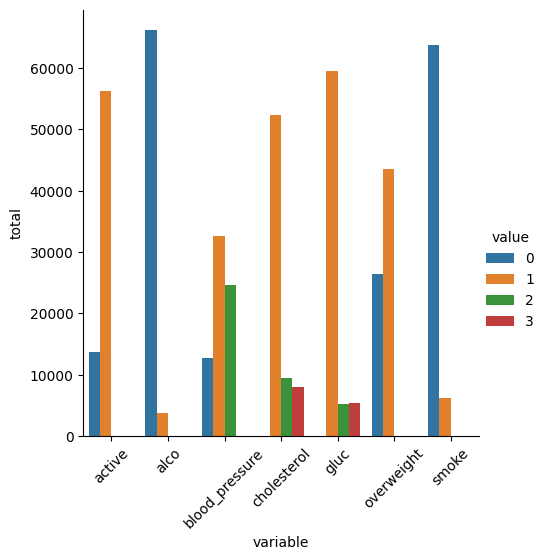

In [23]:
# examine the density of the data
df_cat = pd.melt(df, value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke', 'blood_pressure'], var_name='variable', value_name='value')
df_cat = df_cat.groupby(['variable', 'value']).size().reset_index(name='total')
sns.catplot(x="variable", y="total", hue="value", kind="bar", data=df_cat)
plt.xticks(rotation=45)
plt.show()

In [24]:
dn = df.copy()

In [25]:
for column in dn.select_dtypes(include=[np.number]):
    dn[column] = (dn[column] - dn[column].mean()) / dn[column].std()

In [26]:
dn

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight,blood_pressure
0,-0.493457,1.364009,0.443352,-0.847886,-0.122176,-0.088243,-0.539333,-0.395753,-0.310904,-0.238402,0.494190,-0.999436,-0.917092,-1.282990,-0.240505
1,0.245596,-0.733123,-1.018231,0.749752,0.072600,-0.035189,2.400724,-0.395753,-0.310904,-0.238402,0.494190,1.000550,1.210429,0.779418,1.165851
2,-0.197835,-0.733123,0.077956,-0.708961,0.007674,-0.141297,2.400724,-0.395753,-0.310904,-0.238402,-2.023486,1.000550,-0.664285,-1.282990,-0.240505
3,-0.789078,1.364009,0.565151,0.541364,0.137525,0.017865,-0.539333,-0.395753,-0.310904,-0.238402,0.494190,1.000550,0.189350,0.779418,1.165851
4,-0.789078,-0.733123,-1.018231,-1.264661,-0.187101,-0.194351,-0.539333,-0.395753,-0.310904,-0.238402,-2.023486,-0.999436,-0.746365,-1.282990,-1.646860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.050025,1.364009,0.443352,0.124589,-0.057251,-0.088243,-0.539333,-0.395753,3.216384,-0.238402,0.494190,-0.999436,-0.102856,0.779418,-0.240505
69996,1.280271,-0.733123,-0.774634,3.597715,0.072600,-0.035189,0.930695,1.351557,-0.310904,-0.238402,0.494190,1.000550,3.761484,0.779418,1.165851
69997,-0.197835,1.364009,2.270331,2.139002,0.332300,-0.035189,2.400724,-0.395753,-0.310904,4.194528,-2.023486,1.000550,0.622734,0.779418,1.165851
69998,1.132460,-0.733123,-0.165641,-0.153261,0.040137,-0.088243,-0.539333,1.351557,-0.310904,-0.238402,-2.023486,1.000550,-0.074949,0.779418,-0.240505


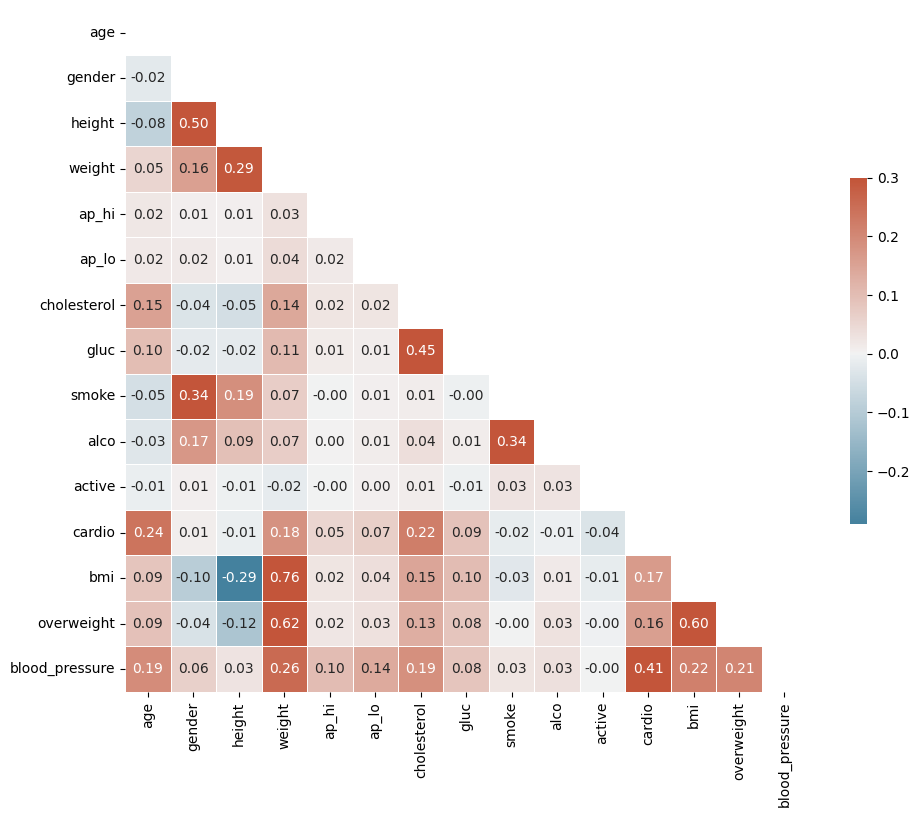

In [27]:
# calculate the correlation matrix
corr = dn.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Data Preprocessing

In [28]:
dn['cardio'] = df['cardio']

In [29]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dn.drop(['cardio'], axis=1), dn['cardio'], test_size=0.2, random_state=42)

# train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions and calculate the accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.723674810687241


In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', cm)

# calculate the sensitivity
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

# calculate the specificity
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# calculate the precision
precision = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision : ', precision)

# calculate the recall
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print('Recall : ', recall)

# calculate the f1 score
f1 = 2*precision*recall/(precision+recall)
print('F1 score : ', f1)

Confusion Matrix :  [[5253 1732]
 [2136 4877]]
Sensitivity :  0.7520400858983536
Specificity :  0.6954227862540995
Precision :  0.7379331215009836
Recall :  0.6954227862540995
F1 score :  0.7160475701071796


In [31]:
# calculate the auc score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC score : ', auc)

AUC score :  0.7237314360762265


In [32]:
# calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

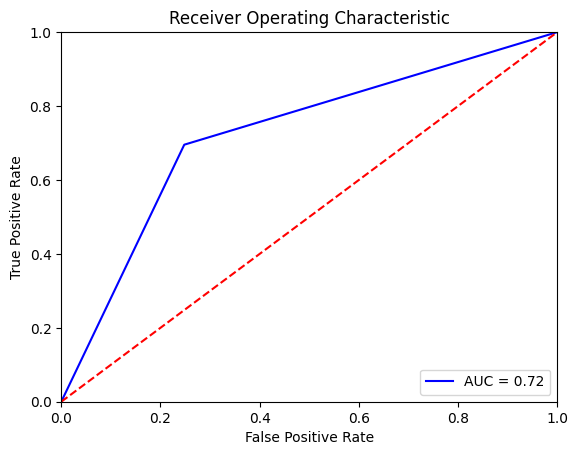

In [33]:
# plot the roc curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

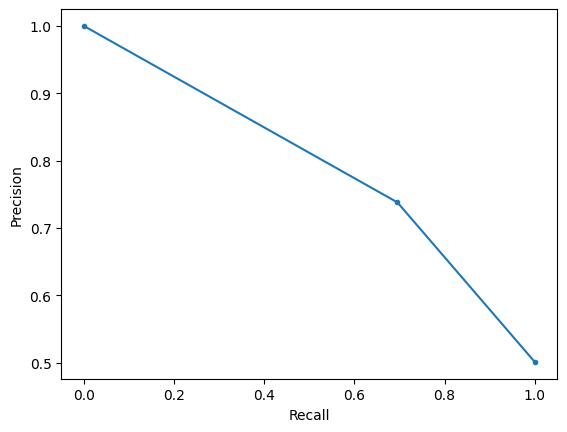

In [34]:
# calculate the precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [35]:
# calculate the f1 score for each threshold
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average=None)
f1

array([0.73090302, 0.71604757])

In [36]:
# calculate the average f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.7234604371520842

In [37]:
# calculate the average precision score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
average_precision

0.6657687350273424

In [38]:
# calculate the average recall score
from sklearn.metrics import recall_score
average_recall = recall_score(y_test, y_pred, average='weighted')
average_recall

0.723674810687241

In [39]:
# Different models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [40]:
# get a list of models to evaluate
def get_models():
    # define the dictionary of models 
    models = dict()
    models['gb'] = GradientBoostingClassifier()
    models['ada'] = AdaBoostClassifier()
    return models

In [41]:
# evaluate a give model using cross-validation
def evaluate_model(model):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [42]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize performance
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>gb 0.736 (0.005)
>ada 0.731 (0.006)


In [44]:
# finetune the gb model
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.01, 0.1],
                'n_estimators': [10, 50, 100],
                'max_depth': [1, 2, 3],
                'min_samples_split': [1, 2, 3],
                'min_samples_leaf': [1, 2, 3],
                'max_features': [1, 2, 3]}
gb = GradientBoostingClassifier()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [50]:
model = GradientBoostingClassifier(learning_rate=0.1,
                                   max_depth=3,
                                   max_features=3,
                                   min_samples_leaf=1,
                                   min_samples_split=2,
                                   n_estimators=100
                                   )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
# evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : ', accuracy)

Accuracy :  0.723674810687241


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6985
           1       0.76      0.68      0.72      7013

    accuracy                           0.73     13998
   macro avg       0.73      0.73      0.73     13998
weighted avg       0.73      0.73      0.73     13998



Precision: The precision for class 0 is 0.71, which means that among all the instances predicted as 0 by the model, 71% are actually 0. The precision for class 1 is 0.76, which means that among all the instances predicted as 1 by the model, 76% are actually 1.

Recall: The recall for class 0 is 0.79, which means that among all the instances that are actually 0, 79% are correctly identified by the model. The recall for class 1 is 0.68, which means that among all the instances that are actually 1, 68% are correctly identified by the model.

F1-score: The F1-score for class 0 is 0.75, which is the harmonic mean of precision and recall. The F1-score for class 1 is 0.72.

Support: The number of instances for each class in the test set.

Accuracy: The overall accuracy of the model on the test set is 0.73.

Macro average: The macro average of precision, recall, and F1-score is calculated as the average of the scores for both classes.

Weighted average: The weighted average of precision, recall, and F1-score is calculated as the weighted average of the scores for both classes, weighted by the number of instances in each class.

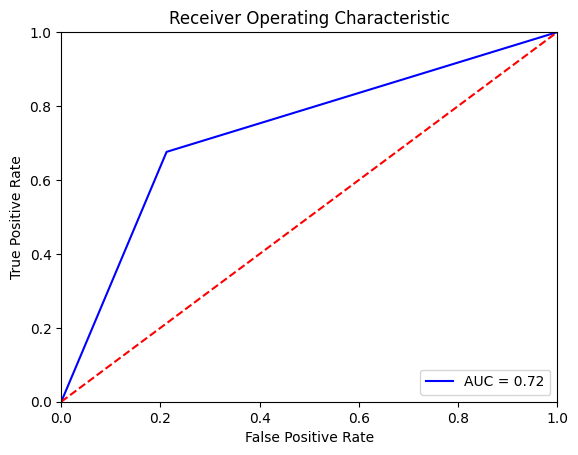

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the roc curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Based on the classification report and the ROC curve, the model appears to perform reasonably well with an accuracy of 73%. However, there is still room for improvement as the precision, recall, and F1-score for both classes are not optimal, with scores ranging between 0.68 to 0.79.

Therefore, further analysis and refinement of the model may be necessary to achieve better performance. Additionally, it may be useful to consider other evaluation metrics and conduct further testing on different datasets to ensure the robustness of the model.